<a href="https://colab.research.google.com/github/thyagomota/21FCS390Z/blob/main/resources/colab/src/colab_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


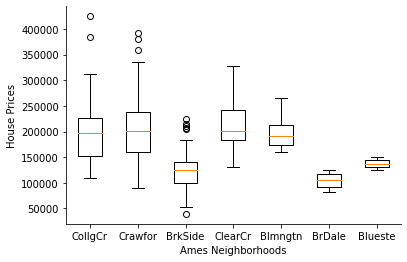

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats
import csv
import os
from google.colab import drive
drive.mount('/content/drive')

DATA_FOLDER = '/content/drive/MyDrive/Colab Datasets/ames_dataset'
DATA_FILE   = 'train.csv'
NEIGHBORHOODS_TO_COMPARE = ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor']

nbhoods = []
prices = []
with open(os.path.join(DATA_FOLDER, DATA_FILE), 'rt') as csv_file:
    row_number = 0
    for row in csv.reader(csv_file):
        row_number += 1
        if row_number == 1:
            continue
        nbhood = row[12]
        if nbhood not in NEIGHBORHOODS_TO_COMPARE:
            continue
        if nbhood not in nbhoods:
            nbhoods.append(nbhood)
            prices.append([])
        index = nbhoods.index(nbhood)
        price = int(row[80])
        prices[index].append(price)
        

medians = [ stats.median(nbhood_prices) for nbhood_prices in prices ]
plt.boxplot(prices)
axes = plt.gca()
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
axes.set_xticklabels(nbhoods)
plt.xlabel('Ames Neighborhoods')
plt.ylabel('House Prices')
plt.show()